<a href="https://colab.research.google.com/github/AshwiniDahiphale/CatvsDog1/blob/main/CatVsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 22.5MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.3MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [17]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 120ms/step - loss: 0.0721 - accuracy: 0.9757 - val_loss: 0.6306 - val_accuracy: 0.7952
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.0666 - accuracy: 0.9771 - val_loss: 0.6855 - val_accuracy: 0.8110
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0485 - accuracy: 0.9842 - val_loss: 0.7193 - val_accuracy: 0.8354
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.0517 - accuracy: 0.9819 - val_loss: 0.7686 - val_accuracy: 0.8450
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.0397 - accuracy: 0.9864 - val_loss: 0.9484 - val_accuracy: 0.7976
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.0398 - accuracy: 0.9868 - val_loss: 0.6488 - val_accuracy: 0.8282
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.0442 - accuracy: 0.9870 - val_loss: 0.8363 - val_ac

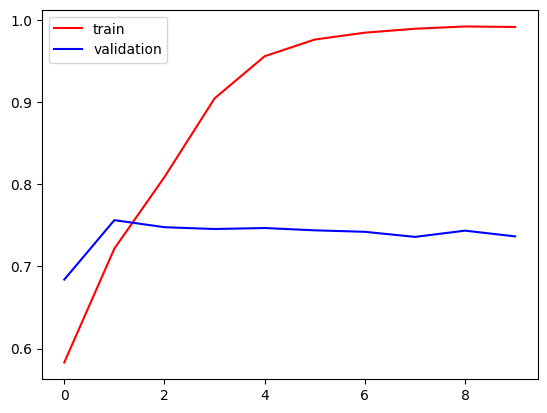

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

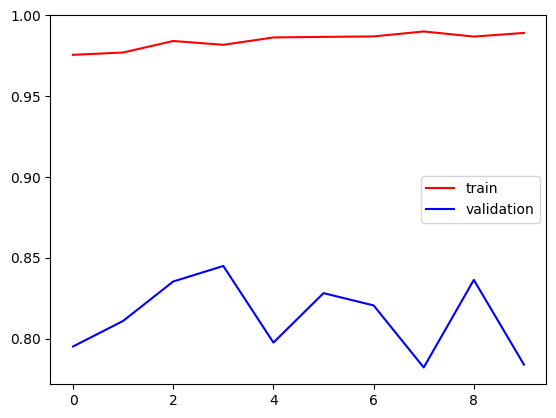

In [22]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

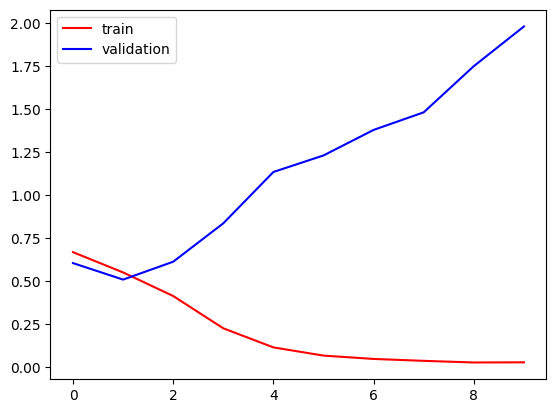

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

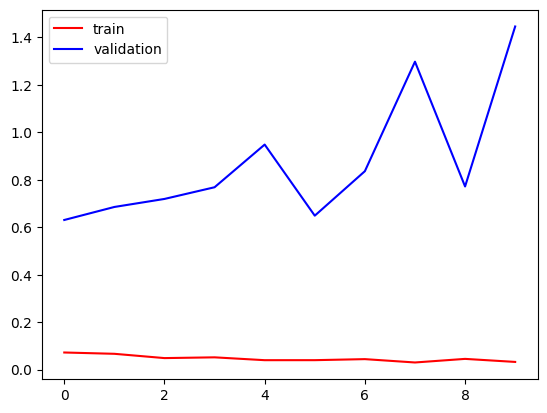

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
import cv2

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
test_img=cv2.imread('/content/drive/MyDrive/pexels-photo-3361739.jpeg')

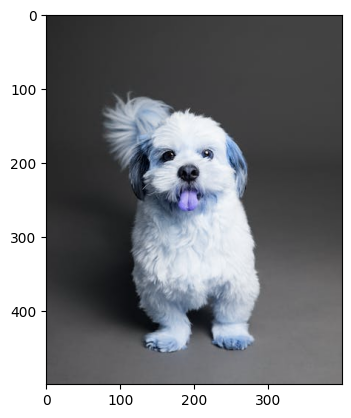

In [33]:
plt.imshow(test_img)

In [34]:
test_img.shape

(500, 400, 3)

In [35]:
test_img=cv2.resize(test_img,(256,256))

In [36]:
test_input=test_img.reshape((1,256,256,3))

In [37]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)

In [38]:
test_img=cv2.imread('/content/drive/MyDrive/cat-2083492_1280.jpg')

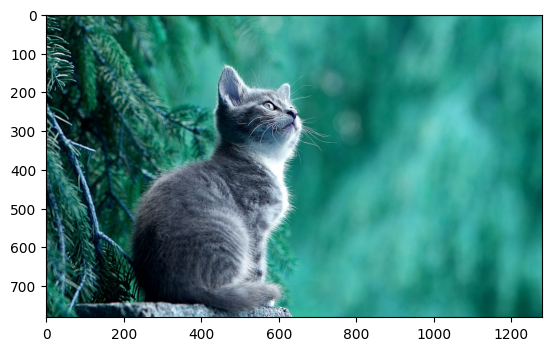

In [39]:
plt.imshow(test_img)

In [40]:
test_img.shape

(781, 1280, 3)

In [41]:
test_img=cv2.resize(test_img,(256,256))

In [42]:
test_input=test_img.reshape((1,256,256,3))

In [43]:
model.predict(test_input)

1/1 [==============================] - 0s 93ms/step


array([[1.]], dtype=float32)